## The Metric

### Clean Indoor Air Act Exemptions Dataset - Magda

The data set [Allegheny County Clean Indoor Air Act Exemptions](https://data.wprdc.org/dataset/allegheny-county-clean-indoor-air-act-exemptions) keeps track of establishments within Allegheny County that have received an exemption from the Pennsylvania Clean Indoor Air Act. The act is meant to protect residents from harmful effects of secondhand and thirdhand emmisions. The best neighborhood would surely care about the health of its citizens and the environment that hosts them. Since the signing of the act in 2008, 159 establishments have received exemptions, with more surely on the way, in the Pittsburgh area alone. Generated below is a heat map for the number of exceptions in each neighborhood, whose data has been collected from the cleanAirAct.csv. The South Side Flats are clearly identified as an outlier with its dark red hue. This neighborhood in particular is known to host a significant portion of Pittsburgh's nightlife, so it is understandable that the high concentration of entertainment establishments would have a high exemption rate.

In [7]:
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

#data frame created
exemptions = pd.read_csv("cleanAirAct.csv")

exemptions.head(n = 159)

,Shape,Bus_Type,Status,Establishm,Trade_Name,Address,Neighborhood,City,State,ZIP,Latitude_A,Longitude_,DE_LID_Num,License_Nu
0,Point,Drinking Establishment Type I,Approved,"MORTBAR, INC.",NaN,3011 West Liberty Avenue,Allentown,Pittsburgh,PA,15216.0,40.392905,-80.037020,39819.0,R-10337
1,Point,Drinking Establishment Type I,Approved,"Gardeb, Inc.",R Bar,2883 West Liberty Avenue,Beechview,Pittsburgh,PA,15216.0,40.395219,-80.033531,61443.0,R-8000
2,Point,Drinking Establishment Type I,Approved,"Apple Inn, Inc.",Apple Inn,2895 West Liberty Avenue Dormont,Beechview,Pittsburgh,PA,15216.0,40.394829,-80.034232,12688.0,R-07348
3,Point,Drinking Establishment Type I,Approved,"Bedrock Cafe, Inc.","Bedrock Cafe, Inc.",604 Hampshire Avenue,Beechview,Pittsburgh,PA,15216.0,40.410765,-80.019251,51879.0,R-02696
4,Point,Drinking Establishment Type I,Approved,"Alpine LDA, Inc.",The Alpine,1544 Beechview Avenue,Beechview,Pittsburgh,PA,15216.0,40.411012,-80.025025,60492.0,R-9832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Point,Drinking Establishment Type I,Approved,"Hoople's, Inc.",Hoople's,2350 Railroad Street - Suite 100,Upper Lawrenceville,Pittsburgh,PA,15210.0,40.390766,-79.985881,42584.0,R-10266
155,Point,Drinking Establishment Type I,Approved,"Doug's Den, Inc.",Doug's Den,2301-03 Brownsville Road,Upper Lawrenceville,Pittsburgh,PA,15210.0,40.389305,-79.985024,42585.0,R-12642
156,Point,Drinking Establishment Type I,Approved,"DeGiroma, Inc.",Rocco's Inn,7105 Harrison Avenue,West End,Pittsburgh,PA,15218.0,40.422197,-79.897660,52661.0,R-16665
157,Point,Drinking Establishment Type I,Approved,The Ezra X Association,NaN,941 Liberty Ave 2nd Floor,West Oakland,Pittsburgh,PA,15222.0,40.443586,-79.996624,63329.0,CC-1489


In [8]:
#create data frame of two columns: neighborhood and occurence (found by shape metric)
num_exemptions = exemptions.groupby("Neighborhood").count()["Shape"]

#prints table of Pittsburgh's 90 neighborhoods and cooresponding number of exemptions
num_exemptions.sort_values(ascending = False)


Neighborhood
South Side Flats             22
Bloomfield                    8
Carrick                       8
Brookline                     7
Central Business District     6
Lower Lawrenceville           5
Middle Hill                   5
Homewood North                5
Strip District                5
Beechview                     5
Greenfield                    4
Central Oakland               4
Lincoln Lemington Belmar      4
Troy Hill                     4
Lincoln Place                 4
Marshall-Shadeland            4
North Oakland                 3
Upper Lawrenceville           3
Mount Washington              3
Central Lawrenceville         3
East Allegheny                3
Polish Hill                   3
Crawford Roberts              3
South Side Slopes             2
Overbrook                     2
Hazelwood                     2
Shadyside                     2
Brighton Heights              2
Homewood South                2
Central North Side            2
Crafton Heights            

Text(0.5, 1.0, 'Number of Clean Air Act Exemptions in Pittsburgh')

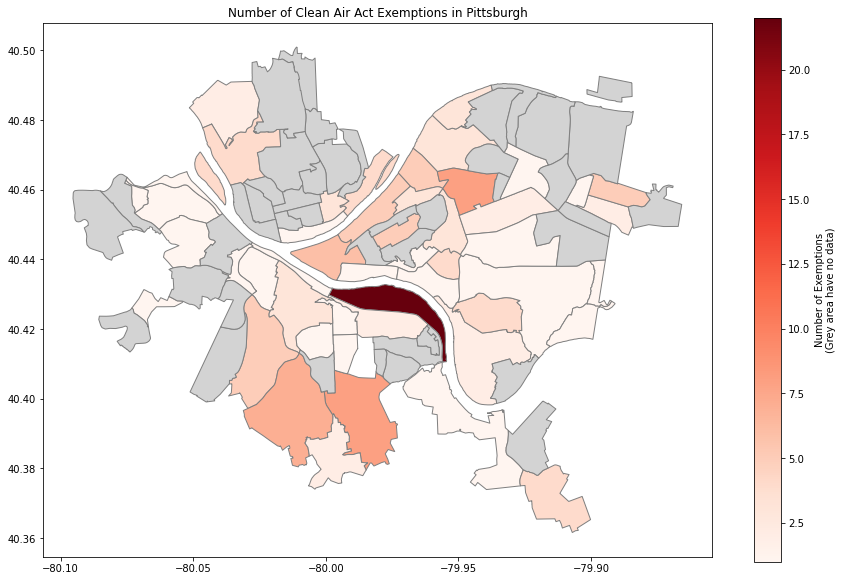

In [9]:
#create a map of Pittsburgh
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

#merge the neighborhood, occurences, and geometry
exemption_map = neighborhoods.merge(num_exemptions, how='left', left_on='hood', right_on='Neighborhood')

exemption_map.plot(column='Shape', # data to be used for coloring
               cmap='Reds',              # color palette
               edgecolor="grey",        # outline the districts in grey
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Exemptions\n(Grey area have no data)"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to lightgrey
               )
plt.title("Number of Clean Air Act Exemptions in Pittsburgh")

The dataset used was a list of exemtions from the Pennsylvania Clean Indoor Air Act based on which neighborhood they were located in. About two-thirds of the ninety neighborhoods had at least one exemption. The remaining third of the neighborhods had no exemptions listed at the time of collection. Due to this, the metric measured had to be simplified to purely a question of whether or not a there were any exemptions. If one were to rank the locations on exemptions, thirty-six neighborhoods would tie for first place with no exemptions listed. Therefore the dataset could only serve as an *eliminator* of neighborhoods rather than one that ranks. The thirty-six remaining neighborhoods who reportedly do not have exemptions and are candidates for the best Pittsburgh neighborhood are as follows:

- Allegheny Center
- Allegheny West
- Arlington
- Arlington Heights
- Banksville
- Bedford Dwellings
- Bon Air
- California-Kirkbride
- Chateau
- East Carnegie
- East Hills
- Fairywood
- Fineview
- Friendship
- Garfield
- Glen Hazel
- Highland Park
- Larimer
- Manchester
- Morningside
- Mount Oliver
- New Homestead
- Northview Heights
- Perry North
- Perry South
- Point Breeze
- Point Breeze North
- Ridgemont
- Spring Garden
- Spring Hill-City View
- St. Clair
- Stanton Heights
- Summer Hill
- Terrace Village
- Upper Hill
- Windgap